## Clustering-1

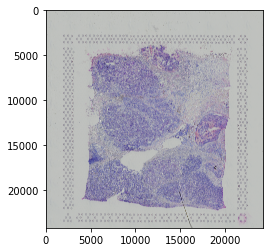

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
  
%matplotlib inline 
  
# Read in the image 
image = cv2.imread("files/UntitledFolder/V1_Breast_Cancer_Block_A_Section_1_image.tif") 
# Change color to RGB (from BGR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
plt.imshow(image)

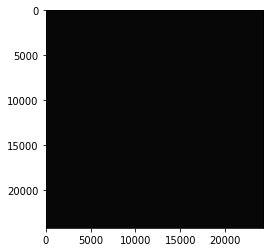

In [2]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB) 
pixel_vals = image.reshape((-1,3)) 

# Convert to float type 
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 

# then perform k-means clustering wit h number of clusters defined as 3 
#also random centres are initally chosed for k-means clustering 
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

# convert data into 8-bit values 
centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 

# reshape data into the original image dimensions 
segmented_image = segmented_data.reshape((image.shape)) 
plt.imshow(segmented_image)

In [ ]:
import os
os.getcwd()

##  Two Clusters of Image

In [10]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [11]:
elhas_raster = rio.open("files/UntitledFolder/V1_Breast_Cancer_Block_A_Section_1_image.tif")
print(elhas_raster.meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 24240, 'height': 24240, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


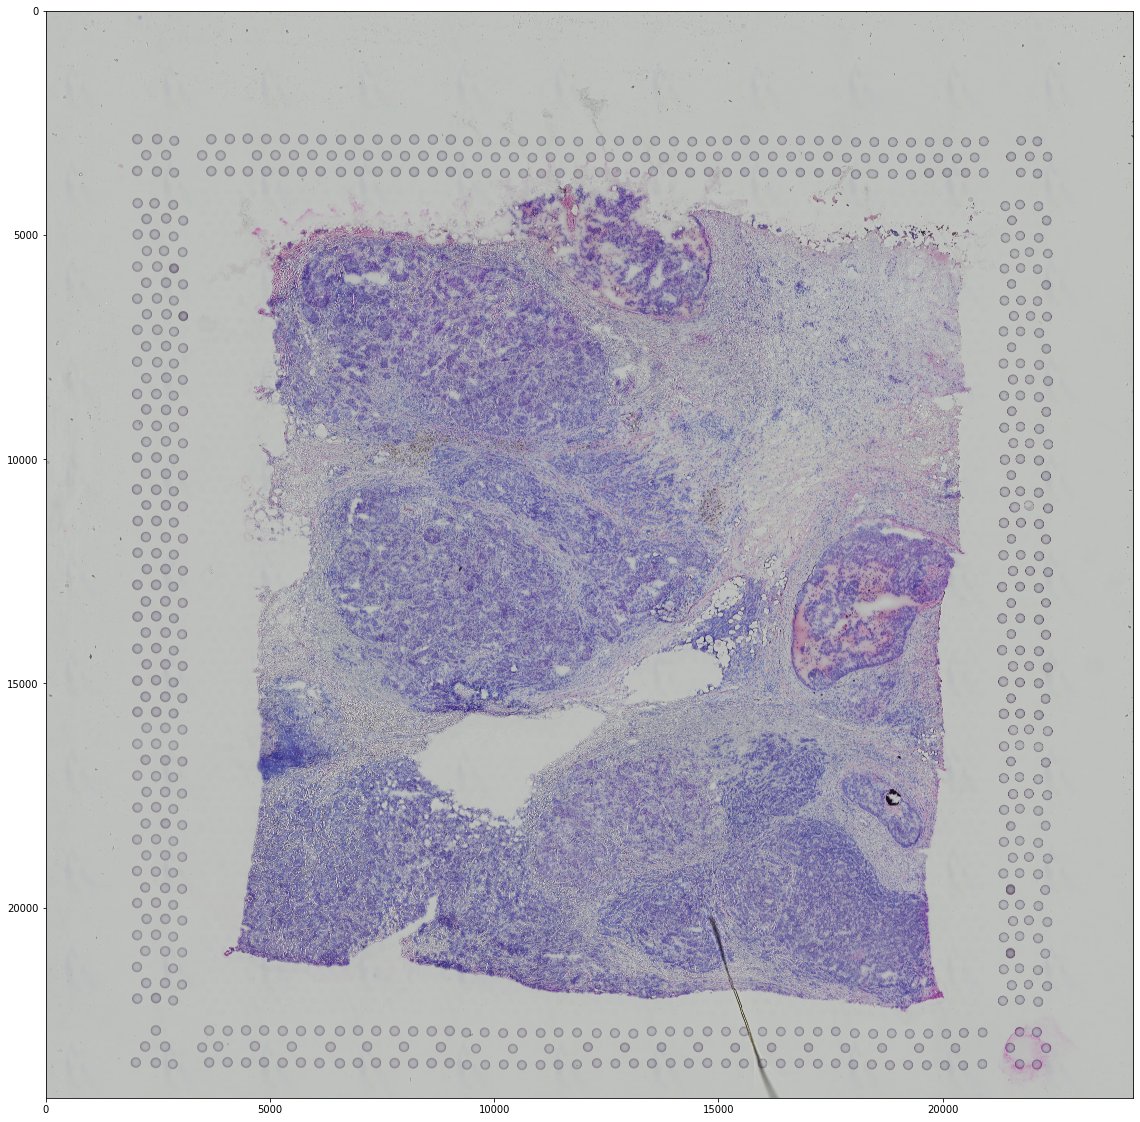

In [12]:
elhas_arr = elhas_raster.read() # read the opened image
vmin, vmax = np.nanpercentile(elhas_arr, (5,95))  # 5-95% contrast stretch
# show the enhanced image
plt.figure(figsize=[20,20])
show(elhas_raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [13]:
imgxyb = np.empty((elhas_raster.height, elhas_raster.width, elhas_raster.count), elhas_raster.meta['dtype'])
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = elhas_raster.read(band+1)
img1d=imgxyb[:,:,:3].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))

In [14]:
cl = cluster.KMeans(n_clusters=2) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)

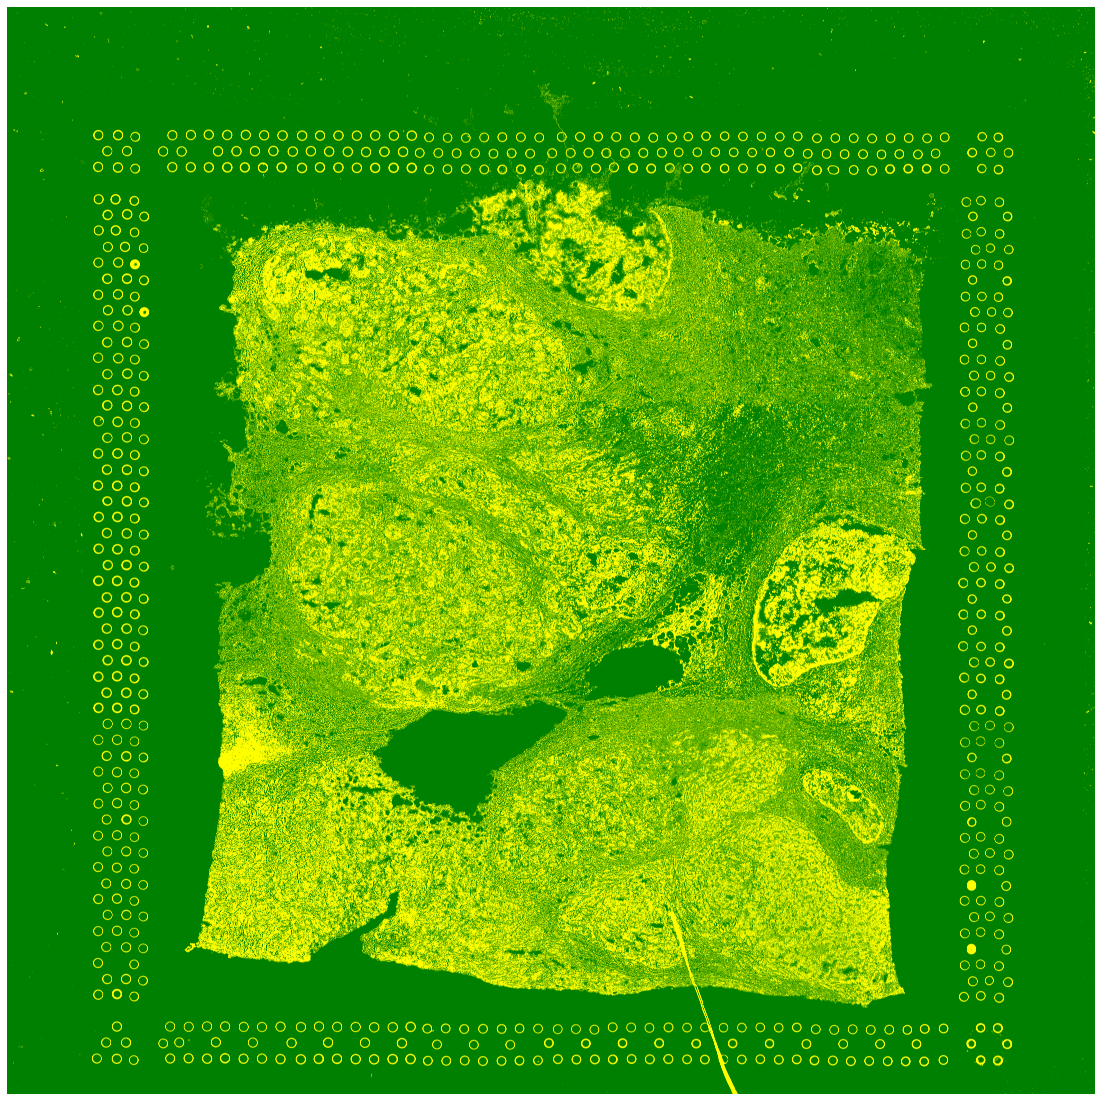

In [17]:
import matplotlib
# Create a custom color map to represent our different 4 classes
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow"])
# Show the resulting array and save it as jpg image
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
#plt.savefig("elhas_clustered.jpg", bbox_inches='tight')
plt.show()

## Colour Histogram Bar

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2

image = cv2.imread('files/UntitledFolder/V1_Breast_Cancer_Block_A_Section_1_image.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show our image
#plt.figure()
#plt.axis("off")
#plt.imshow(image)

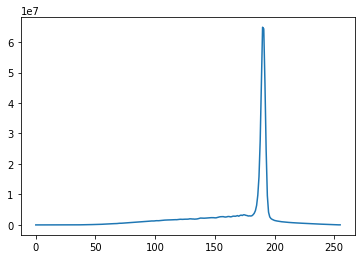

In [4]:
#img = cv2.imread('D:/onkar/Projects/Project_Spt.Transcriptomics/Input_files/V1_Breast_Cancer_Block_A_Section_1_image.tif',0)
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist) 
plt.show() 

In [5]:
image = image.reshape(24240*24240, 3)
clt = KMeans(n_clusters = 2)
clt.fit(image)

KMeans(n_clusters=2)

In [6]:
import numpy as np
import cv2
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    # return the histogram
    return hist
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

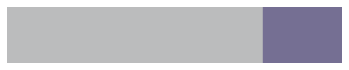

In [9]:
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

## Hist-Equalised Image Clustering

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


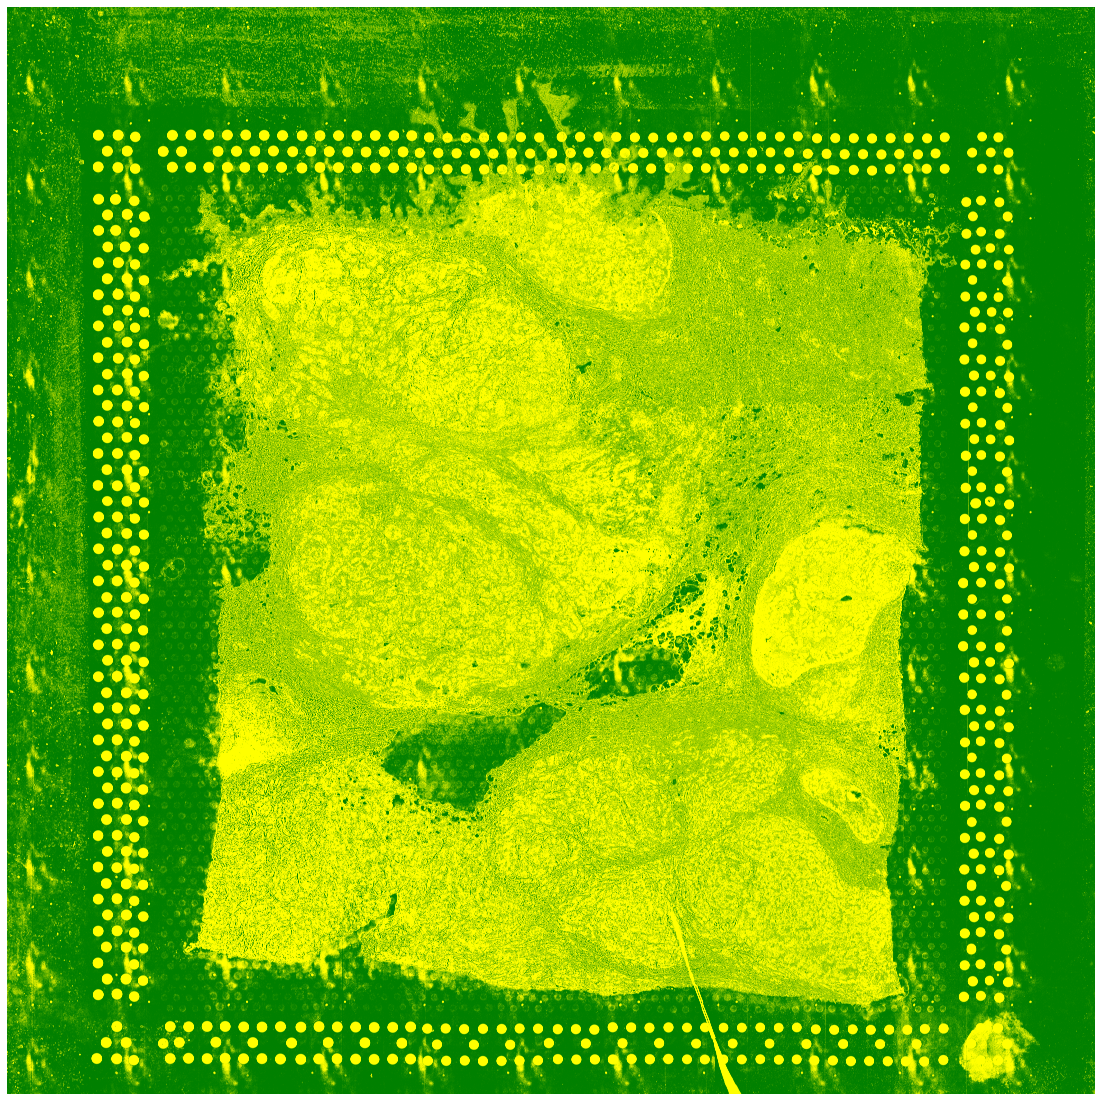

In [7]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
elhas_raster = rio.open("files/UntitledFolder/final_equ_img.jpg")
#print(elhas_raster.meta)
elhas_arr = elhas_raster.read() # read the opened image
vmin, vmax = np.nanpercentile(elhas_arr, (5,95))  # 5-95% contrast stretch
# show the enhanced image
plt.figure(figsize=[20,20])
#show(elhas_raster, cmap='gray', vmin=vmin, vmax=vmax)
#plt.show()
imgxyb = np.empty((elhas_raster.height, elhas_raster.width, elhas_raster.count), elhas_raster.meta['dtype'])
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = elhas_raster.read(band+1)
img1d=imgxyb[:,:,:3].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))
cl = cluster.KMeans(n_clusters=2) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)
import matplotlib
# Create a custom color map to represent our different 4 classes
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow"])
# Show the resulting array and save it as jpg image
#plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
#plt.savefig("elhas_clustered.jpg", bbox_inches='tight')
plt.show()

## Hist Equalised Colour bar

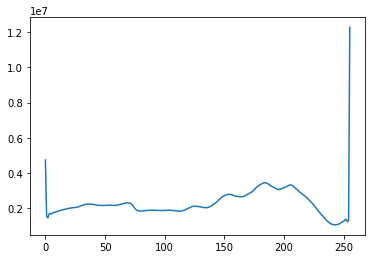

KMeans(n_clusters=2)

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2
image = cv2.imread('files/UntitledFolder/final_equ_img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist) 
plt.show() 
image = image.reshape(24240*24240, 3)
clt = KMeans(n_clusters = 2)
clt.fit(image)

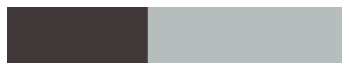

In [6]:
import numpy as np
import cv2
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    # return the histogram
    return hist
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

## Contrast Stretched Image Clustering

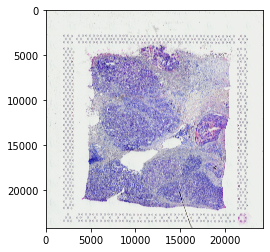

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 

# Read in the image 
image = cv2.imread("files/UntitledFolder/V1_Breast_Cancer_Block_A_Section_1_image.tif") 
# Change color to RGB (from BGR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
#plt.imshow(image)
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(image, table)
plt.imshow(img)
cv2.imwrite('CS_img.jpg',img)

In [13]:
import os
os.getcwd()

'/gpfs1/homes/s4634945'

In [ ]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
elhas_raster = rio.open("/gpfs1/homes/s4634945/CS_img.jpg")
#print(elhas_raster.meta)
elhas_arr = elhas_raster.read() # read the opened image
vmin, vmax = np.nanpercentile(elhas_arr, (5,95))  # 5-95% contrast stretch
# show the enhanced image
plt.figure(figsize=[20,20])
#show(elhas_arr, cmap='gray', vmin=vmin, vmax=vmax)
#plt.show()
imgxyb = np.empty((elhas_raster.height, elhas_raster.width, elhas_raster.count), elhas_raster.meta['dtype'])
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = elhas_raster.read(band+1)
img1d=imgxyb[:,:,:3].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))
cl = cluster.KMeans(n_clusters=2) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)
import matplotlib
# Create a custom color map to represent our different 4 classes
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow"])
# Show the resulting array and save it as jpg image
#plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
#plt.savefig("elhas_clustered.jpg", bbox_inches='tight')
plt.show()

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


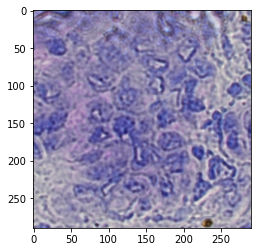

In [8]:
import cv2
img = cv2.imread('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/1000img.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)

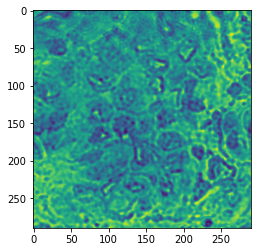

In [13]:
import cv2
img = cv2.imread('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/1000img.tif',0)
plt.imshow(img)

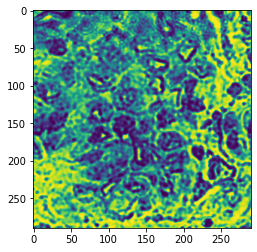

In [12]:
import cv2
img = cv2.imread('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/1000img.tif',0)
equ = cv2.equalizeHist(img) 
plt.imshow(equ)

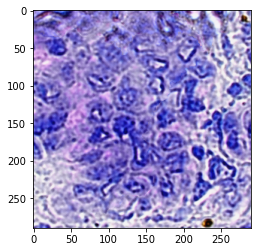

In [6]:
import matplotlib.pyplot as plt
import numpy as np
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(image, table)
plt.imshow(img)

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
train_Y = pd.read_csv('/90days/s4634945/files/UntitledFolder/train_Y.csv')
train_Y = train_Y.sort_values(by=['Sno'])
filename = train_Y['Sno']+str(".tif")
filename = filename.to_list()
images = sorted(glob.glob("/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/*.tif"))
for i in range(0,len(images)):
    img1 = cv2.imread(images[i])
     

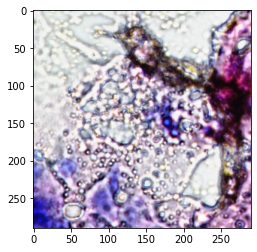

In [23]:
img = cv2.imread("/90days/s4634945/files/UntitledFolder/Sharpened_1A/0007img.tif")
plt.imshow(img)